In [410]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("./flight_delays (3).csv")
data.tail()

,flight_id,airline,origin,destination,dep_time,day_of_week,weather,delay_min
195,F1195,American Airlines,ORD,BOS,11:02,7,Clear,26
196,F1196,American Airlines,JFK,MIA,02:44,2,Snowy,57
197,F1197,JetBlue,JFK,MIA,00:57,7,Foggy,56
198,F1198,Southwest,DFW,SEA,08:33,4,Clear,7
199,F1199,American Airlines,JFK,DEN,21:01,7,Stormy,28


In [411]:
data.describe()

,day_of_week,delay_min
count,200.000000,200.000000
mean,4.030000,52.660000
std,2.032178,31.699189
min,1.000000,0.000000
25%,2.000000,26.750000
50%,4.000000,53.000000
75%,6.000000,77.000000
max,7.000000,118.000000


In [412]:
from sklearn.preprocessing import LabelEncoder

encoder = {}
for column in [ "airline", "origin", "destination", "weather" ]:
    encoder[column] = LabelEncoder()
    data[column] = encoder[column].fit_transform(data[column])
data

,flight_id,airline,origin,destination,dep_time,day_of_week,weather,delay_min
0,F1000,4,2,4,16:15,2,1,76
1,F1001,2,1,3,13:55,1,2,90
2,F1002,3,3,1,00:09,1,0,14
3,F1003,2,4,3,18:39,3,1,90
4,F1004,2,4,0,18:00,3,0,6
...,...,...,...,...,...,...,...,...
195,F1195,0,4,0,11:02,7,0,26
196,F1196,0,2,2,02:44,2,3,57
197,F1197,2,2,2,00:57,7,1,56
198,F1198,3,1,3,08:33,4,0,7


In [413]:
def tim_to_mint(tim_str):
  hours, minutes = map(int,tim_str.split(":"))
  return hours*60 + minutes
data["dep_time"]=data["dep_time"].apply(tim_to_mint)
print(data[['dep_time']].tail())


     dep_time
195       662
196       164
197        57
198       513
199      1261


In [414]:
data.isnull().describe()
#داده نال وجود ندارد

,flight_id,airline,origin,destination,dep_time,day_of_week,weather,delay_min
count,200,200,200,200,200,200,200,200
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,200,200,200,200,200,200,200,200


In [415]:
data.isnull().sum()
#داده نال وجود ندارد

flight_id      0
airline        0
origin         0
destination    0
dep_time       0
day_of_week    0
weather        0
delay_min      0
dtype: int64

In [416]:
data["delay_min"].describe()

count    200.000000
mean      52.660000
std       31.699189
min        0.000000
25%       26.750000
50%       53.000000
75%       77.000000
max      118.000000
Name: delay_min, dtype: float64

In [417]:

data["dep_time"].describe()

count     200.000000
mean      760.955000
std       400.958103
min         9.000000
25%       414.250000
50%       802.000000
75%      1084.750000
max      1420.000000
Name: dep_time, dtype: float64

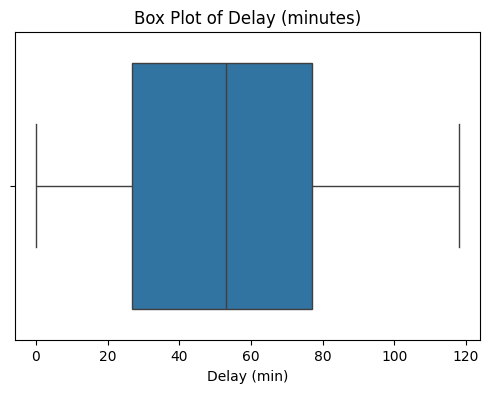

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=data["delay_min"])
plt.title("Box Plot of Delay (minutes)")
plt.xlabel("Delay (min)")
plt.show()


# چون دیدیم که تاخیر بیشتر از 90  دقیقه است پس  میانگین جایگذاری میکنیم


In [419]:
max_delay = data["delay_min"].max()
print(f"بیشترین تأخیر: {max_delay} دقیقه")

بیشترین تأخیر: 118 دقیقه


In [420]:
delay = len([data["delay_min"]>90])
print(f"{delay} پرواز تأخیر غیرعادی دارند")

1 پرواز تأخیر غیرعادی دارند


In [421]:
median= data["delay_min"].median()
data["delay_min"]=data["delay_min"].apply(lambda x:median if x > 90 else x)

In [422]:
print("آمار توصیفی تأخیرها:")
print(data["delay_min"].describe())


آمار توصیفی تأخیرها:
count    200.00000
mean      44.92500
std       23.56429
min        0.00000
25%       26.75000
50%       53.00000
75%       58.00000
max       90.00000
Name: delay_min, dtype: float64


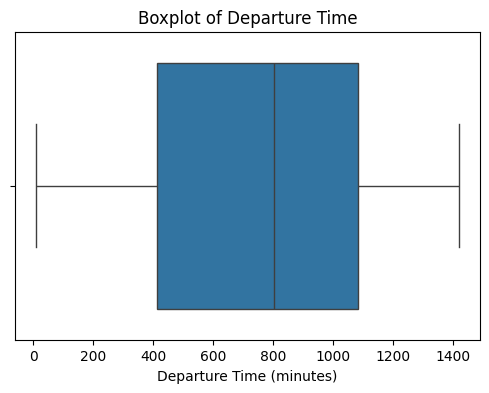

In [423]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["dep_time"])
plt.title("Boxplot of Departure Time")
plt.xlabel("Departure Time (minutes)")
plt.show()

In [424]:
max_delay = data["dep_time"].max()
print(f"بیشترین زمان: {max_delay} دقیقه")

بیشترین زمان: 1420 دقیقه


In [425]:
max_time  = len([data["dep_time"]>1400])
print(f"{max_time}زمان غرعادی")

1زمان غرعادی


In [426]:
# شناسایی داده‌های نامعتبر
invalid_times = data[(data["dep_time"] < 0) | (data["dep_time"] >= 1440)]
print(f"تعداد زمان‌های نامعتبر: {len(invalid_times)}")

# حذف یا اصلاح داده‌های نامعتبر
data_clean = data[(data["dep_time"] >= 0) & (data["dep_time"] < 1440)]


تعداد زمان‌های نامعتبر: 0


In [427]:
data["dep_time"].describe()

count     200.000000
mean      760.955000
std       400.958103
min         9.000000
25%       414.250000
50%       802.000000
75%      1084.750000
max      1420.000000
Name: dep_time, dtype: float64

In [428]:
from sklearn.model_selection import train_test_split
x = data.drop(["delay_min", "flight_id"], axis=1)
y = data["delay_min"]
X_train, X_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)
print(f"تعداد داده‌های آموزش: {len(X_train)}")
print(f"تعداد داده‌های آزمون: {len(X_test)}")


تعداد داده‌های آموزش: 160
تعداد داده‌های آزمون: 40


In [429]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


MAE: 14.45
R2 Score: 0.37


## Mean Absolute Error = خطای میانگین مطلق
یعنی مدل، به طور میانگین حدود ۱۵.۸۹ دقیقه با مقدار واقعی تأخیرها اختلاف داره.
### ضریب تعیین (R-squared)
### مقداری بین 0 تا 1 هست که نشون می‌ده مدل چقدر خوب می‌تونه داده رو توضیح بده.

1.0 یعنی پیش‌بینی بی‌نقص

0.0 یعنی مدل هیچ چیزی رو نتونسته یاد بگیره

0.26 یعنی مدل فقط حدود ۲۶٪ از تغییرات تأخیر پرواز رو تونسته توضیح بده